In [ ]:
'''
Time series analysys
'''

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0


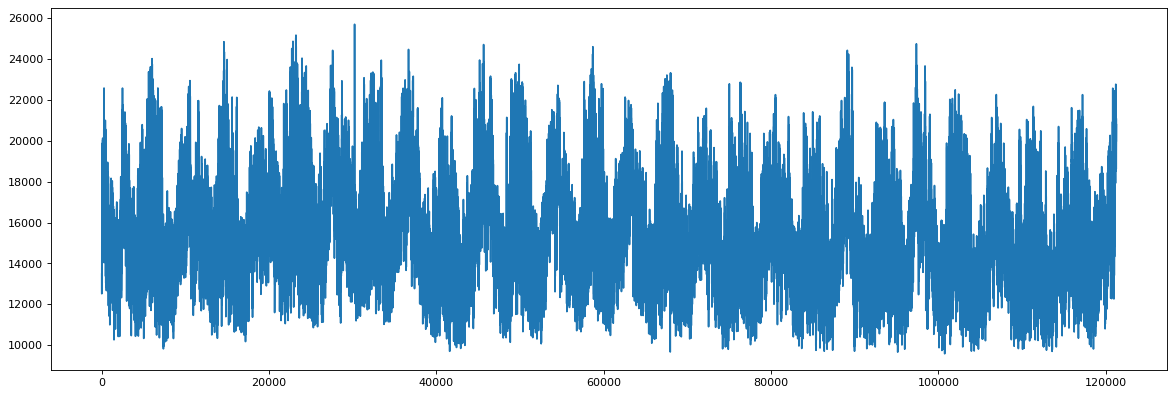

In [ ]:
# Read data
AEP_hourly = pd.read_csv('AEP_hourly.csv')
print(AEP_hourly.head())
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
AEP_hourly["AEP_MW"].plot()
plt.show()

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1): 
	dataX, dataY = [], []
	for i in range(len(dataset) - look_back - 1):
		a = dataset[i:(i + look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# Dataset Preproccesing
dataset = AEP_hourly.copy()
dataset.drop(['Datetime'], axis = 1, inplace=True) 

# Normalize the dataset
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X = t and Y = t+1
look_back = 90
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# SMAPE
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))


In [ ]:
# Applying LSTM

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=1024, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate SMAPE
trainScore = smape(trainY[0], trainPredict[:,0])
print('Train Score: %.2f' % (trainScore))
testScore = smape(testY[0], testPredict[:,0])
print('Test Score: %.2f' % (testScore))


Epoch 1/5
107/107 - 2s - loss: 0.0369
Epoch 2/5
107/107 - 0s - loss: 0.0095
Epoch 3/5
107/107 - 0s - loss: 0.0044
Epoch 4/5
107/107 - 0s - loss: 0.0030
Epoch 5/5
107/107 - 0s - loss: 0.0024
Train Score: 3.73
Test Score: 3.79


In [ ]:
# Applying GRU

# Create and fit the GRU network
model = Sequential()
model.add(GRU(75, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=1024, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate SMAPE
trainScore = smape(trainY[0], trainPredict[:,0])
print('Train Score: %.2f' % (trainScore))
testScore = smape(testY[0], testPredict[:,0])
print('Test Score: %.2f' % (testScore))



Epoch 1/5
107/107 - 2s - loss: 0.0138
Epoch 2/5
107/107 - 1s - loss: 0.0023
Epoch 3/5
107/107 - 1s - loss: 0.0015
Epoch 4/5
107/107 - 1s - loss: 0.0012
Epoch 5/5
107/107 - 1s - loss: 9.8075e-04
Train Score: 2.28
Test Score: 2.27
